# Loop in Python for sampling of n LHS distributed points

The code is generating random numbers within a specified range and calling the matlab function Main.m to evaluate single sampling points in every loop.

In [2]:
import matlab.engine
import pandas as pd
import numpy as np
from numpy import savetxt
from numpy import asarray
from tqdm import tqdm
from doepy import build
import matplotlib.pyplot as plt
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D  

#to load matlab engine
eng = matlab.engine.start_matlab()

# to generate random floating point values
from random import seed
from random import random
seed(10)


to install matlab.engine
https://www.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html

Design of experiments

In [11]:
n=10 #number of samples

# input variables ranges and design of experiments 

#Recommended values... design domain for random LHS
# Amin1, Amax1 = [0.0,  0.0]   #Angles
Vmin2, Vmax2 = [0.5, 2.0]   #Velocity
# dmin1, dmax1 = [1.3,  1.3]   #Leg diameter
# dmin2, dmax2 = [0.4 , 0.8]   #Brace diameter
smin, smax = [287e6 , 347e6]   #317*10^6 flow stress
# Emin, Emax = [210000e6, 210000e6] #210000*10^6 young modulus

x = np.zeros( (n, 9) )

#Latin Hypercube design -------------------------------------------------
# 6000 tons with added mass included
# Xdoe=build.space_filling_lhs(
#             {'Angle':[Amin1,Amax1],
#         'Velocity':[Vmin2, Vmax2],
#         'DLeg':[dmin1,dmax1], 
#         'DBrace':[dmin2,dmax2], 
#         'FlowSt':[smin,smax], 
#         'YoungM':[Emin,Emax]},
#         num_samples = n
#         )

Xdoe=build.space_filling_lhs(
            {'Velocity':[Vmin2, Vmax2], 
               'FlowSt':[smin,smax]},
        num_samples = n
        )

# %matplotlib notebook ---------------------------------------------------------
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(Xdoe['Angle'], Xdoe['Velocity'], Xdoe['DLeg'])
# ax.set_xlabel('Angle')
# ax.set_ylabel('Velocity')
# ax.set_zlabel('Time to stop')-------------------------------------------------

In [12]:
Xdoe

,Velocity,FlowSt
0,1.333333,3.070000e+08
1,1.166667,3.270000e+08
2,0.666667,3.003333e+08
3,1.000000,3.403333e+08
4,0.500000,3.336667e+08
5,1.833333,2.870000e+08
6,2.000000,2.936667e+08
7,0.833333,3.470000e+08
8,1.666667,3.203333e+08
9,1.500000,3.136667e+08


Simulator execution

In [13]:
#LOOP PYTHON

user=input("Save the data file? (y/n): ")
if user == "y" or user == "yes" :
    filename= input("Name of the file (*.csv): ")
    delta = 0.1 #to save file every 10% of progress
    alpha = n*delta

# fixing parameters for the solver
Angle = 0.0
Dleg = 1.3
Dbra = 0.65
YM = 210000e6

# for i in range(0, n):
for i in tqdm(range(0, n)):

    # Angle= Xdoe.Angle[i].tolist()
    # Angle= 0.0 # from original code
    Veloc= Xdoe.Velocity[i].tolist()
    sigma= Xdoe.FlowSt[i].tolist()
    # YM = Xdoe.YoungM[i].tolist()
    # Dleg=  Xdoe.DLeg[i].tolist()
    # Dbra=  Xdoe.DBrace[i].tolist()
    
    # Matlab (Timothee)
    #[Screening] = Main(ShipAngle,ShipSpeed,Dextleg,Dextbra,Sigma,YoungM)
    #     Output = [timeIndex, Penetration, MaxForce]
    x_ = eng.Main(Angle, Veloc, Dleg, Dbra, sigma, YM)
    #to convert from Matlab to NumpyArray
    x[i,0] = Angle
    x[i,1] = Veloc
    x[i,2] =  Dleg
    x[i,3] =  Dbra
    x[i,4] =  sigma
    x[i,5] =  YM

    x[i,6:9] = np.array(x_)
    if user == "y" or user == "yes" :
        if i >= alpha:
            savetxt(filename, x, delimiter=',')
            alpha=alpha+n*delta
print('Completed')
# print( x )


if user == "y" or user == "yes" :
    savetxt(filename, x, delimiter=',')
    print('Saved file: ',filename)

100%|██████████| 10/10 [03:57<00:00, 23.77s/it]

Completed
Saved file:  10p_LSH_Vel_sigma.csv


Plotting the design of experiments (3 inputs)

In [1]:
# %matplotlib notebook 
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(Xdoe['Angle'], Xdoe['Velocity'], Xdoe['DLeg'])
# ax.set_xlabel('Angle')
# ax.set_ylabel('Velocity')
# ax.set_zlabel('DLeg')

# LOOP in PYTHON for random sampling of n points

In [2]:
n= int(input("Number of samples: "))

#user recommended values...

# min1, max1=input("Enter the min and max values for Angle (Min  Max): ").split()
# min1 = float (min1)
# max1 = float (max1)
# min2, max2=input("Enter the min and max values for Velocity (Min  Max): ").split()
# min2 = float (min2)
# max2 = float (max2)
# dmin1, dmax1=input("Enter the min and max values for DLeg (Min  Max): ").split()
# dmin1 = float (dmin1)
# dmax1 = float (dmax1)
# dmin2, dmax2=input("Enter the min and max values for DBrace (Min  Max): ").split()
# dmin2 = float (dmin2)
# dmax2 = float (dmax2)

#Recommended values... design domain
min1, max1 = [0.0,  45.0]   #Angles
min2, max2 = [0.1, 5.5]   #Velocity
dmin1, dmax1 = [0.8,  2.3]   #Leg diameter
dmin2, dmax2 = [0.4 , 0.8]   #Brace diameter

x = np.zeros( (n, 7) )

user=input("Save the data file? (y/n): ")
if user == "y" or user == "yes" :
    filename= input("Name of the file (*.csv): ")
    delta = 0.1 #to save file every 10% of progress
    alpha = n*delta

# for i in range(0, n):
for i in tqdm(range(0, n)):
    #random values between a range
#     print(i)
    x1_0=random()
    x2_0=random()
    x3_0=random()
    x4_0=random()
    #scaled value
    Angle= min1+(x1_0*(max1-min1))
    Veloc= min2+(x2_0*(max2-min2))
    Dleg= dmin1+(x3_0*(dmax1-dmin1))
    Dbra= dmin2+(x4_0*(dmax2-dmin2))
    #to convert from NumpyArray to Matlab 
    #Angle=matlab.double(angle_.tolist())
    #Veloc=matlab.double(veloc_.tolist())
    #print ('Angle ' + str(Angle) + 'Velocity ' + str(Veloc))
    #executing Matlab Function
    #print(i)
    x_ = eng.Main(Angle,Veloc,Dleg,Dbra)
    #to convert from Matlab to NumpyArray
    x[i,0] = Angle
    x[i,1] = Veloc
    x[i,2] =  Dleg
    x[i,3] =  Dbra
    x[i,4:7] = np.array(x_)
    if user == "y" or user == "yes" :
        if i >= alpha:
            savetxt(filename, x, delimiter=',')
            alpha=alpha+n*delta

print('Completed')

if user == "y" or user == "yes" :
    savetxt(filename, x, delimiter=',')
    print('Saved file: ',filename)
    
# end = time.time()
# print('Elapsed time')
# print(end - start)

Number of samples: 500
Enter the min and max values for Angle (Min  Max): 0 45
Enter the min and max values for Velocity (Min  Max): 0.1 5.5
Enter the min and max values for DLeg (Min  Max): 0.8 2.3
Enter the min and max values for DBrace (Min  Max): 0.4 0.8
Save the data file? (y/n): y
Name of the file (*.csv): 500_fixedAng.csv


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [5:29:20<00:00, 39.52s/it]

Completed
Saved file:  500_fixedAng.csv


# Plotting responses

<IPython.core.display.Javascript object>


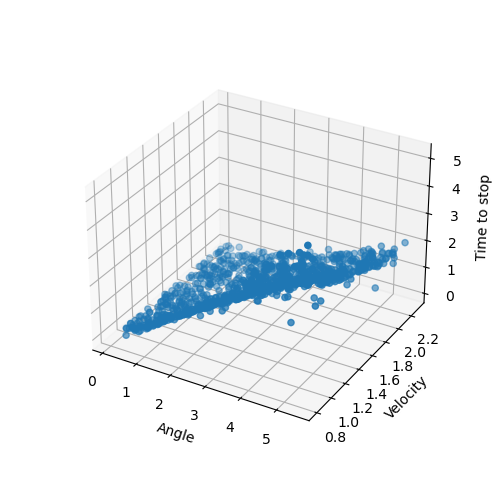

<IPython.core.display.Javascript object>


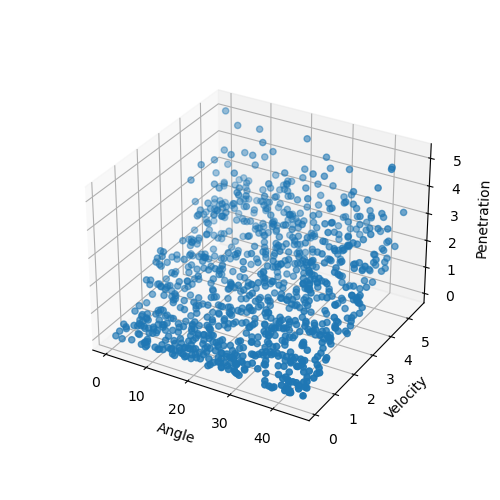

<IPython.core.display.Javascript object>


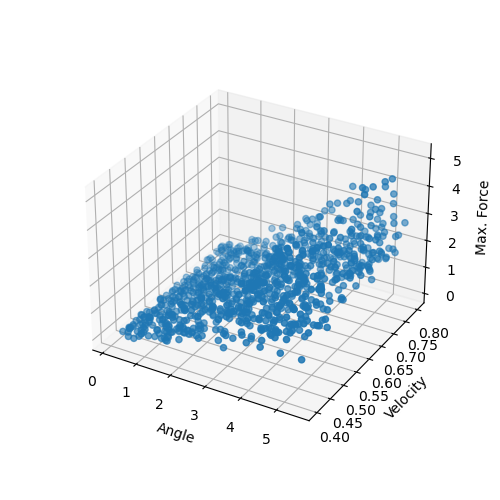

In [4]:
import matplotlib.pyplot as plt
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D  

%matplotlib notebook 

x = genfromtxt('1000Rand_WithDiam.csv', delimiter=',')

# X index ===(0)Angle; (1)Velocity; (2)Dleg; (3)Dbrace; (4)StopTime; (5)Penetration; (6)Max.Force

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,1], x[:,2], x[:,5])
ax.set_xlabel('Angle')
ax.set_ylabel('Velocity')
ax.set_zlabel('Time to stop')

 
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,5])
ax.set_xlabel('Angle')
ax.set_ylabel('Velocity')
ax.set_zlabel('Penetration')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,1], x[:,3], x[:,5])
ax.set_xlabel('Angle')
ax.set_ylabel('Velocity')
ax.set_zlabel('Max. Force')

plt.show()


# Scatter Matrix 2 inputs 3 outputs

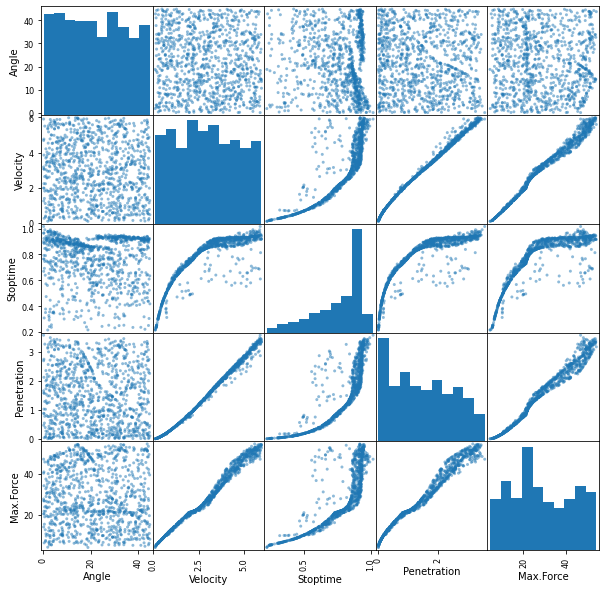

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D  

# %matplotlib notebook 

x = genfromtxt('1000RndSamp.csv', delimiter=',')

# X index ===(0)Angle; (1)Velocity; (2)StopTime; (3)Penetration; (4)Max.Force

df = pd.DataFrame(x, columns=["Angle", "Velocity", "Stoptime", "Penetration", "Max.Force"])
scatter_matrix(df, figsize=(10, 10));

# Scatter Matrix 4 inputs 3 outputs (time to stop not plotted)

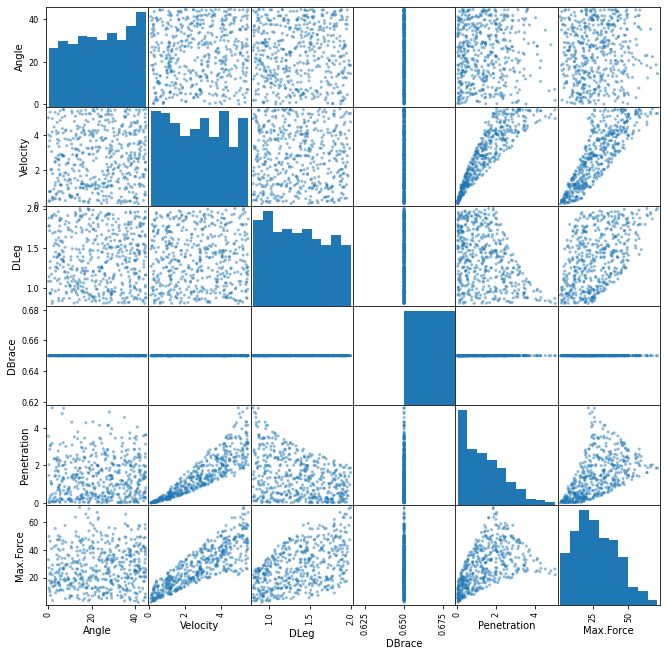

In [9]:
import pandas as pd
from pandas.plotting import scatter_matrix
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D  

# %matplotlib notebook 

x = genfromtxt('500_fixedDbrace.csv', delimiter=',')

# X index ===(0)Angle; (1)Velocity; (2)Dleg; (3)Dbrace; (4)StopTime; (5)Penetration; (6)Max.Force
x_ = x[:,[0,1,2,3,5,6]]

df = pd.DataFrame(x_, columns=["Angle", "Velocity", "DLeg", "DBrace", "Penetration", "Max.Force"])
scatter_matrix(df, figsize=(11, 11));

# With loop in Matlab

This code requires a modification so that Main.m can take a matrix of input values and then make the loop in Matlab. The current Main.m file can only take as inputs velocity and angle.

In [ ]:
#LOOP MATLAB
import matlab.engine
import numpy as np
import time

start = time.time()
#to load matlab engine
eng = matlab.engine.start_matlab()
# to generate random floating point values
from random import seed
from random import random
# seed random number generator
seed(10)

n= int(input("Number of samples: "))
#Recommended values...
#Angles [Min,Max]=[-44  45]
#Velocities [Min,Max]=[0.1  5] m/s
mix1, max1=input("Enter the min and max values for Angle [Min, Max ]: ").split()
mix1 = float (mix1)
max1 = float (max1)
mix2, max2=input("Enter the min and max values for Velocity [Min, Max ]: ").split()
mix2 = float (mix2)
max2 = float (max2)

#allocation of memory for samples
angle_ = np.zeros( (n, 1) )
veloc_ = np.zeros( (n, 1) )

for i in range(0, n):
    #random values between a range
    x1_0=random()
    x2_0=random()
    #scaled value of x1 and x2
    x1= mix1+(x1_0*(max1-mix1))
    x2= mix2+(x2_0*(max2-mix2))
     #saving data in the sample matrix
    angle_[i]=x1
    veloc_[i]=x2

#print(angle)
#print(veloc)

#to convert from NumpyArray to Matlab 
Angle=matlab.double(angle_.tolist())
Veloc=matlab.double(veloc_.tolist())

#executing Matlab Function
x = eng.Main(Angle,Veloc)
#to convert from Matlab to NumpyArray
b = np.array(x)
print(b)
end = time.time()
print('Elapsed time')
print(end - start)